# Train Model

In [2]:
from comet_ml import Experiment
from pytorch_lightning.loggers import CometLogger
from src import datasets
import torch
from src.architectures import *
from torch.utils.data import Dataset, DataLoader
import pytorch_lightning as pl
import torchvision
from pytorch_lightning.loggers import MLFlowLogger

%config Completer.use_jedi = False

In [4]:
root = "data/dataset2014/dataset/baseline/office/groundtruth/"
train_dataset = datasets.ImageData("data/dataset2014/dataset/baseline/office/input/")
test_dataset = datasets.ImageData("data/dataset2014/dataset/baseline/highway/input/")
show = transforms.ToPILImage()

In [5]:
val_lenth = 100
test_dataset, val_dataset = torch.utils.data.random_split(test_dataset, [len(test_dataset)-100,100])
len(train_dataset),len(test_dataset),len(val_dataset)

(2050, 1600, 100)

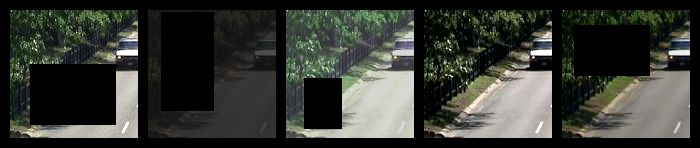

In [7]:
x,y  = test_dataset[98]
show = transforms.ToPILImage()
showSeq = lambda xs: [show(x.squeeze(0)) for x in torch.split(xs,1)]
#showSeq(x)
grid = torchvision.utils.make_grid(x, nrow=10, padding=10)
show(grid)

In [11]:
COMET_ML_PROJECT = "BG-extraction"
torch.cuda.empty_cache()

train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
#train_loaders = [DataLoader(train_dataset, batch_size=2, shuffle=True) for train_dataset in train_datasets] 
test_loader = DataLoader(test_dataset,batch_size=10)
planes  = 8
downsampling_factor= 2
encoder_num_blocks = 10
decoder_num_blocks = 10
smooth_num_blocks  = 10
agg_block = "Attention"
mode = 'softmax2'
num_heads= 4
dim_feedforward = 64
num_layers = 2

experiment_name = agg_block

#lr_monitor = LearningRateMonitor(logging_interval='step')

net = DeepAggNet(planes=planes, downsampling_factor=downsampling_factor,
                 encoder_num_blocks=encoder_num_blocks, 
                 decoder_num_blocks=decoder_num_blocks,
                 smooth_num_blocks=smooth_num_blocks,
                 agg_block=agg_block, mode=mode,num_heads=num_heads,
                 dim_feedforward=dim_feedforward, num_layers=num_layers)

    # Create Logger
comet_logger = CometLogger(
    api_key="tMEjeyq5M7v1IPRCvS5fyGyuo",
    workspace="semjon", # Optional
    project_name= COMET_ML_PROJECT, # Optional
    # rest_api_key=os.environ["COMET_REST_KEY"], 
    save_dir='./hyperparameter',
    experiment_name=experiment_name, # Optional,
    #display_summary_level = 0
)

#early_stop = pl.callbacks.EarlyStopping('val_loss', patience=20)
trainer = pl.Trainer(gpus=1,logger=comet_logger, max_epochs=200, 
                     progress_bar_refresh_rate=None, 
                     fast_dev_run=False)
trainer.fit(net, train_loader, val_dataloaders=test_loader)
test_loss = trainer.test(net, test_loader)[0]["test_loss"]  

CometLogger will be initialized in online mode
GPU available: True, used: True
TPU available: None, using: 0 TPU cores
COMET INFO: -----------------------------------
COMET INFO: Comet.ml ExistingExperiment Summary
COMET INFO: -----------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/semjon/bg-extraction/0bd655f7af1c445e984026a0d40f503e
COMET INFO:   Others:
COMET INFO:     Name : Attention
COMET INFO:   Parameters:
COMET INFO:     decoder_num_blocks  : 10
COMET INFO:     dim_feedforward     : 64
COMET INFO:     downsampling_factor : 2
COMET INFO:     embed_dim           : 32
COMET INFO:     encoder_num_blocks  : 10
COMET INFO:     mode                : softmax
COMET INFO:     num_heads           : 4
COMET INFO:     num_layers          : 2
COMET INFO:     planes              : 8
COMET INFO:     smooth_num_blocks   : 10
COMET INFO:   Uploads:
COMET INFO:     model graph : 1
COMET INFO: -

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/semjon/bg-extraction/9aebcc7f424f4426bd82868bb416addd
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [1333]      : (0.0007616013172082603, 0.1506783813238144)
COMET INFO:     train_loss [266] : (0.0008323342190124094, 0.03505074977874756)
COMET INFO:     val_loss [64]    : (0.011570797301828861, 0.03421648591756821)
COMET INFO:   Others:
COMET INFO:     Name : Mean
COMET INFO:   Parameters:
COMET INFO:     decoder_num_blocks  : 10
COMET INFO:     dim_feedforward     : 64
COMET INFO:     downsampling_factor : 2
COMET INFO:     embed_dim           : 32
COMET INFO:     encoder_num_blocks  : 10
COMET INFO:     mode                : softmax
COMET INFO:     num_heads           : 4
COMET INFO:     num_layers          : 2
COMET INFO:     p

Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.033610980957746506}
--------------------------------------------------------------------------------


In [ ]:
trainer.fit(net, train_loader, val_dataloaders=val_loader)

In [7]:
import torchvision

dataset = torchvision.datasets.ImageFolder("dataset2014/dataset/baseline/highway/")
x,y = dataset[2001]
X = []

# Test whether aggregation moduls have correct dimensionality:
$ f : \mathcal{P}\left( \mathbb{R}^{(B \times C \times H \times W)} \right) \rightarrow \mathbb{R}^{(B \times C \times H \times W)} $ 

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from src.architectures import *
from torch.utils.tensorboard import SummaryWriter
%config Completer.use_jedi = False

In [17]:
S,B,C,H,W = 10, 5, 64, 256, 256    # Sequence length, Batch size, Channels, Height, Width
x = torch.rand(B, S, 3, H, W).cuda()
softmax = nn.Softmax(1)
softmax(x).sum(1).sum()

tensor(983040., device='cuda:0')